## Chapter7 연속형 확률변수

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

## 7.1   1차원 연속형 확률변수
- 연속형 확률변수에서 확률변수가 어떤 값을 취할 때의 확률을 정의하려고 하면 어떤 경우에도 확률이 0이 되어 정의가 잘 되지 않습니다. 이 때문에 연속형 확률변수에서는 확률변수가 어느 구간에 들어가는 확률을 정의합니다. 
- 예를 들어 룰렛이 0.4부터 0.6사이의 값이 나올 확률이 0.2라는 식으로 정의됩니다.

#### 확률밀도함수
- "연속형 확률변수"가 취할 수 있는 값은 "구간 [a,b]"로 정의됨. 
- "연속형 확률"은 확률밀도함수(probability density function, PDF), 간단히 밀도함수라고 부르는 f(x)를 이용하여 정의됨. 하지만 f(x)=P(X=x)는 되지 않는다. 연속형 확률변수는 어떤 값을 취하는 확률로는 잘 정의되지 않음. 
- "밀도함수에 의한 확률"은 확률변수X가 $x_0 \le X \le x_1$의 구간에 들어갈 확률$P(x_0 \le X \le x_1)$로 정의되고, 다음과 같이 적분으로 계산합니다. 
$\\$
$P(x_0 \le X \le x_1) = \int_{x_0}^{x_1}f(x)dx$

In [3]:
x_range = np.array([0, 1])

In [4]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [5]:
X = [x_range, f]

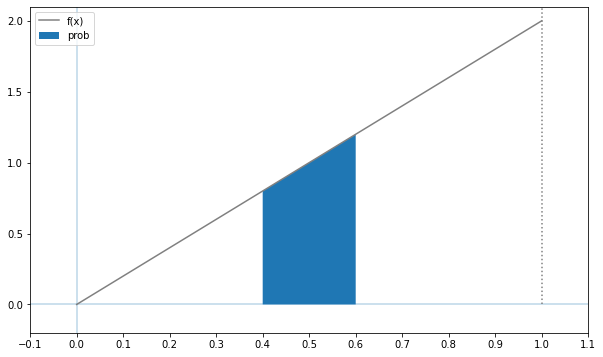

In [6]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6 까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역을 진하게 칠함
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [7]:
# 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

In [8]:
from scipy.optimize import minimize_scalar
res = minimize_scalar(f)
# 함수의 최솟값은 fun이라는 인스턴스 변수에
print(res.x) # x위치에서 (?)
print(res.fun) # f(x)값이 최소값

-1.6180339754913822
0


In [9]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

#### 누적분포함수
- 확률변수X가 x이하가 될 때의 확률을 반환하는 함수를 F(x)로 표기
- 이산형 확률분포의 경우와 마찬가지로 누적분포함수(cumulative distribution function, CDF) 또는 간단히 "분포함수"라고 함
$\\$
$F(x) = P(X \le x) = \int_{-\infty}^{x}f(x)dx$

In [10]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [11]:
F(0.6) - F(0.4)

0.200

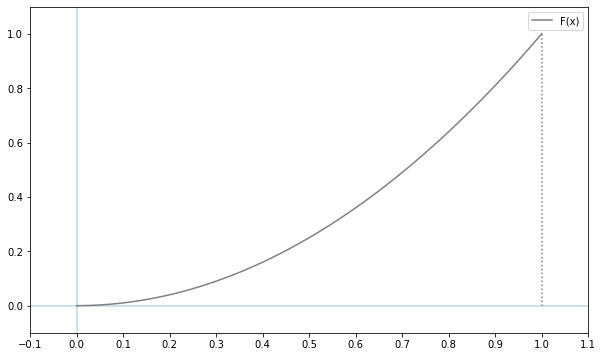

In [12]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')
# ax.vlines(위치C, A,B) # 위치C에 A부터 B까지 선을 그으시오. 
ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

#### 확률변수의 변환
분포한수는 G(y)라고 합시다 
$\\$
$G(y) = P(Y \le y) = \int_{-\infty}^{y}g(y)dy$

In [13]:
y_range = [3, 5]

def g(y): #밀도함수
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0
    
def G(y): #분포함수
    return integrate.quad(g, -np.inf, y)[0]

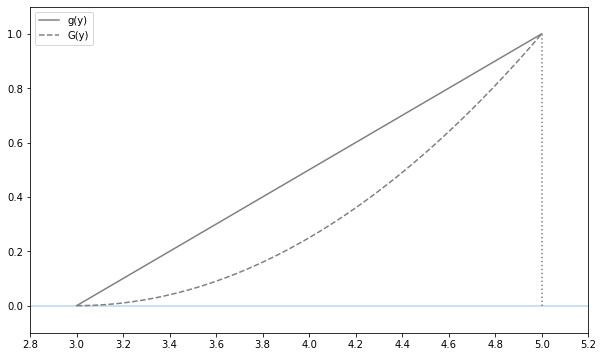

In [14]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys],
        label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys],
        label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

### 1차원 연속형 확률변수의 지표 

#### 기대값(평균)
$\mu=E(X)=\int_{-\infty}^{\infty}xf(x)dx$

In [15]:
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

- 확률변수X를 2X+3으로 변환한 "확률변수Y의 기대값"
$\\$
$E(Y)=E(2X+3)=\int_{-\infty}^{\infty}(2x+3)f(x)dx$

In [16]:
def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [17]:
E(X)

0.667

In [18]:
E(X, g=lambda x: 2*x+3)

4.333

In [19]:
2 * E(X) + 3

4.333

#### 분산
- $V(X)=\sigma^2=\int_{-\infty}^{\infty} (x-\mu)^2f(x)dx   $

In [20]:
mean = E(X)
def integrand(x):
    return (x - mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

$V(Y)=V(2X+3)=\int_{-\infty}^{\infty} ((2x+3)-\mu)^2f(x)dx $
$V(g(x))=\int_{-\infty}^{\infty} (g(x)-E(g(X)))^2f(x)dx $

In [21]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [22]:
V(X)

0.056

In [23]:
V(X, lambda x: 2*x + 3)

0.222

In [24]:
2**2 * V(X)

0.222